In [11]:
import os
import sys
current_filename = os.path.abspath("./kaggle.ipynb")
parent_dir = os.path.dirname(current_filename)
great_parent_dir = os.path.dirname(parent_dir)
sys.path.append(great_parent_dir)

In [48]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [15]:
from tools.config_file import NewUserPredictParams
params = NewUserPredictParams()

In [22]:
# Load raw dataset
train_csv = pd.read_csv(params.train_csv)
test_cvs = pd.read_csv(params.test_csv)
train_csv

,uuid,eid,udmap,common_ts,x1,x2,x3,x4,x5,x6,x7,x8,target
0,0,26,"{""key3"":""67804"",""key2"":""650""}",1689673468244,4,0,41,107,206,1,0,1,0
1,1,26,"{""key3"":""67804"",""key2"":""484""}",1689082941469,4,0,41,24,283,4,8,1,0
2,2,8,unknown,1689407393040,4,0,41,71,288,4,7,1,0
3,3,11,unknown,1689467815688,1,3,41,17,366,1,6,1,0
4,4,26,"{""key3"":""67804"",""key2"":""650""}",1689491751442,0,3,41,92,383,4,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
620351,620351,2,"{""key4"":""14"",""key5"":""14""}",1688990850527,4,0,41,104,37,4,4,1,0
620352,620352,8,unknown,1689490302305,4,0,41,104,37,1,6,1,0
620353,620353,41,"{""key1"":""274"",""key2"":""446""}",1688892078584,0,2,41,104,37,4,2,0,1
620354,620354,26,"{""key3"":""67804"",""key2"":""650""}",1689652960171,4,0,41,17,366,1,6,1,0


In [ ]:
# Concat train and tes
# prosecc time stamp
df_combined = pd.concat([train_csv, test_cvs], ignore_index=True)
df_combined['common_ts'] = df_combined['common_ts'] / 31536000000 + 1970 - 2023
for i in range(1, 10):
    df_combined = df_combined.assign(**{f'key{i}': None})
df_target = df_combined.pop('target')
df_combined['target'] = df_target
df_combined

In [ ]:
# stuff key1 - key9
num_epoch = 0
total_progress = 0
for i in range(len(df_combined['udmap'])):
    item = df_combined['udmap'][i]
    dict = None
    try:
        dict = json.loads(item)
    except json.JSONDecodeError:
        dict = {
            "unknow": True
        }
    for j in range(1, 10):
        try:
            df_combined.at[i, f'key{j}'] = int(dict[f'key{j}'])
        except KeyError:
            df_combined.at[i, f'key{j}'] = -1
    num_epoch += 1
    if num_epoch == 10000:
        total_progress += 1
        print(f"Current progress: {total_progress} w")
        num_epoch = 0
df_combined.to_csv(os.path.join(great_parent_dir, "dataset", "df_combined.csv"), index=False)
print("Save successfully")

In [29]:
df_combined = pd.read_csv(os.path.join(great_parent_dir, "dataset", "df_combined.csv"))
pd.set_option('display.max_columns', None)
df_combined

,uuid,eid,udmap,common_ts,x1,x2,x3,x4,x5,x6,x7,x8,key1,key2,key3,key4,key5,key6,key7,key8,key9,target
0,0,26,"{""key3"":""67804"",""key2"":""650""}",0.579194,4,0,41,107,206,1,0,1,-1,650,67804,-1,-1,-1,-1,-1,-1,0.0
1,1,26,"{""key3"":""67804"",""key2"":""484""}",0.560469,4,0,41,24,283,4,8,1,-1,484,67804,-1,-1,-1,-1,-1,-1,0.0
2,2,8,unknown,0.570757,4,0,41,71,288,4,7,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0
3,3,11,unknown,0.572673,1,3,41,17,366,1,6,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0
4,4,26,"{""key3"":""67804"",""key2"":""650""}",0.573432,0,3,41,92,383,4,8,1,-1,650,67804,-1,-1,-1,-1,-1,-1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827136,206780,25,unknown,0.572913,4,1,41,10,357,1,6,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,NaN
827137,206781,11,unknown,0.572575,4,1,41,107,286,1,6,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,NaN
827138,206782,0,"{""key3"":""87725""}",0.560428,4,3,41,151,237,4,7,1,-1,-1,87725,-1,-1,-1,-1,-1,-1,NaN
827139,206783,34,"{""key3"":""65765""}",0.576406,0,1,41,104,250,1,2,0,-1,-1,65765,-1,-1,-1,-1,-1,-1,NaN


In [38]:
# split train and test
df_train_prosecced = df_combined.iloc[:len(train_csv),:]
df_test_processed = df_combined.iloc[len(train_csv):,:]

In [39]:
df_train_prosecced

,uuid,eid,udmap,common_ts,x1,x2,x3,x4,x5,x6,x7,x8,key1,key2,key3,key4,key5,key6,key7,key8,key9,target
0,0,26,"{""key3"":""67804"",""key2"":""650""}",0.579194,4,0,41,107,206,1,0,1,-1,650,67804,-1,-1,-1,-1,-1,-1,0.0
1,1,26,"{""key3"":""67804"",""key2"":""484""}",0.560469,4,0,41,24,283,4,8,1,-1,484,67804,-1,-1,-1,-1,-1,-1,0.0
2,2,8,unknown,0.570757,4,0,41,71,288,4,7,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0
3,3,11,unknown,0.572673,1,3,41,17,366,1,6,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0
4,4,26,"{""key3"":""67804"",""key2"":""650""}",0.573432,0,3,41,92,383,4,8,1,-1,650,67804,-1,-1,-1,-1,-1,-1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620351,620351,2,"{""key4"":""14"",""key5"":""14""}",0.557549,4,0,41,104,37,4,4,1,-1,-1,-1,14,14,-1,-1,-1,-1,0.0
620352,620352,8,unknown,0.573386,4,0,41,104,37,1,6,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0
620353,620353,41,"{""key1"":""274"",""key2"":""446""}",0.554416,0,2,41,104,37,4,2,0,274,446,-1,-1,-1,-1,-1,-1,-1,1.0
620354,620354,26,"{""key3"":""67804"",""key2"":""650""}",0.578544,4,0,41,17,366,1,6,1,-1,650,67804,-1,-1,-1,-1,-1,-1,0.0


In [40]:
df_test_processed

,uuid,eid,udmap,common_ts,x1,x2,x3,x4,x5,x6,x7,x8,key1,key2,key3,key4,key5,key6,key7,key8,key9,target
620356,0,11,unknown,0.576688,4,1,41,85,343,4,8,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,NaN
620357,1,35,unknown,0.575321,4,0,41,24,283,1,6,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,NaN
620358,2,34,"{""key3"":""73457"",""key2"":""936""}",0.556731,4,2,41,71,288,4,2,0,-1,936,73457,-1,-1,-1,-1,-1,-1,NaN
620359,3,0,"{""key3"":""18771""}",0.567625,1,0,41,104,37,4,8,1,-1,-1,18771,-1,-1,-1,-1,-1,-1,NaN
620360,4,26,"{""key3"":""67804"",""key2"":""650""}",0.574202,0,1,41,115,217,4,8,1,-1,650,67804,-1,-1,-1,-1,-1,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827136,206780,25,unknown,0.572913,4,1,41,10,357,1,6,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,NaN
827137,206781,11,unknown,0.572575,4,1,41,107,286,1,6,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,NaN
827138,206782,0,"{""key3"":""87725""}",0.560428,4,3,41,151,237,4,7,1,-1,-1,87725,-1,-1,-1,-1,-1,-1,NaN
827139,206783,34,"{""key3"":""65765""}",0.576406,0,1,41,104,250,1,2,0,-1,-1,65765,-1,-1,-1,-1,-1,-1,NaN


In [42]:
pearson = df_train_prosecced.drop(columns=['udmap']).corr(method='pearson')

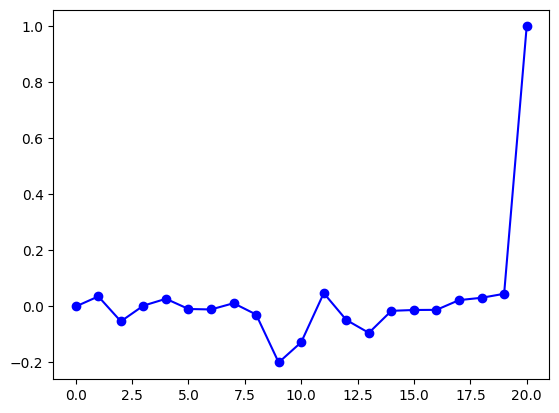

In [50]:
coefficient = list(pearson.iloc[-1,:])
x = range(len(coefficient))
# 创建折线图
plt.plot(x, coefficient, marker='o', linestyle='-', color='b', label='Coefficient')

In [51]:
pearson

,uuid,eid,common_ts,x1,x2,x3,x4,x5,x6,x7,x8,key1,key2,key3,key4,key5,key6,key7,key8,key9,target
uuid,1.000000,0.000183,-0.000628,0.001594,0.000107,-0.001895,-0.000778,-0.000993,-0.000065,-0.000812,-0.001145,0.000778,-0.000413,0.000925,-0.000291,0.000259,-0.000237,0.000009,0.000067,-0.001066,-0.000009
eid,0.000183,1.000000,-0.058139,0.003157,0.044369,0.000949,-0.012432,0.009791,0.028610,-0.202015,-0.347685,-0.072567,0.115554,0.162220,-0.533314,-0.537033,-0.014016,-0.020500,-0.008076,-0.070796,0.035941
common_ts,-0.000628,-0.058139,1.000000,-0.020990,-0.055021,0.014343,0.006625,0.004509,-0.652145,-0.071674,0.184667,-0.032516,0.019225,-0.007609,0.019823,0.018813,0.008850,-0.018601,-0.019436,-0.027865,-0.053144
x1,0.001594,0.003157,-0.020990,1.000000,0.027141,-0.006335,-0.003229,-0.011904,-0.032753,-0.014764,-0.031639,0.012768,0.003597,-0.000963,0.000993,-0.000184,-0.004599,0.004211,0.006565,0.010140,0.002941
x2,0.000107,0.044369,-0.055021,0.027141,1.000000,-0.016740,-0.012860,0.020626,0.044131,-0.082782,-0.145542,0.027743,-0.010600,0.012250,-0.015455,-0.015687,0.001215,0.010058,0.011756,0.017399,0.027476
x3,-0.001895,0.000949,0.014343,-0.006335,-0.016740,1.000000,0.004846,-0.013763,-0.012861,-0.008993,0.003160,-0.003578,-0.001050,-0.000082,-0.005043,-0.005218,0.000418,-0.005463,-0.001817,0.001437,-0.008969
x4,-0.000778,-0.012432,0.006625,-0.003229,-0.012860,0.004846,1.000000,-0.070606,0.002889,0.021447,0.036651,-0.007259,-0.000775,-0.003290,0.000871,0.000151,0.004226,-0.002998,-0.005171,-0.006881,-0.010642
x5,-0.000993,0.009791,0.004509,-0.011904,0.020626,-0.013763,-0.070606,1.000000,-0.010919,-0.028954,-0.028009,0.002381,-0.005374,0.000516,-0.007575,-0.006599,0.000428,0.002622,0.002325,0.004065,0.011677
x6,-0.000065,0.028610,-0.652145,-0.032753,0.044131,-0.012861,0.002889,-0.010919,1.000000,0.249627,-0.071505,0.015428,-0.002983,0.008373,-0.002513,-0.001899,-0.000925,0.006105,0.005519,0.008247,-0.028725
x7,-0.000812,-0.202015,-0.071674,-0.014764,-0.082782,-0.008993,0.021447,-0.028954,0.249627,1.000000,0.616568,-0.098319,0.033528,-0.067268,0.082455,0.082751,0.020494,-0.040802,-0.046709,-0.067962,-0.199992


In [56]:
df_train_grouped = df_train_prosecced.groupby('eid')
print("Finally, the whole dataset was grouped:")
df_train_grouped.groups.keys()

Finally, the whole dataset was grouped:


dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42])

In [76]:
# 统计 selected_group 中 target=1 的占比
for eid in df_train_grouped.groups.keys():
    selected_group = df_train_grouped.get_group(eid)
    target_count = selected_group['target'].sum()  # 计算 target=1 的数量
    total_count = len(selected_group)  # 计算总行数
    # 计算占比
    percentage = (target_count / total_count) * 100

    print(f"[eid={eid}] \t 总行数：{total_count}\t  该eid在全体train集上的占比:{total_count/len(train_csv)*100:.2f}% \t target=1行数：{target_count}\t target=1 占比：{percentage:.2f}%")

[eid=0] 	 总行数：5355	  该eid在全体train集上的占比:0.86% 	 target=1行数：371.0	 target=1 占比：6.93%
[eid=1] 	 总行数：736	  该eid在全体train集上的占比:0.12% 	 target=1行数：357.0	 target=1 占比：48.51%
[eid=2] 	 总行数：51071	  该eid在全体train集上的占比:8.23% 	 target=1行数：7120.0	 target=1 占比：13.94%
[eid=3] 	 总行数：1951	  该eid在全体train集上的占比:0.31% 	 target=1行数：688.0	 target=1 占比：35.26%
[eid=4] 	 总行数：794	  该eid在全体train集上的占比:0.13% 	 target=1行数：386.0	 target=1 占比：48.61%
[eid=5] 	 总行数：33127	  该eid在全体train集上的占比:5.34% 	 target=1行数：3804.0	 target=1 占比：11.48%
[eid=6] 	 总行数：2	  该eid在全体train集上的占比:0.00% 	 target=1行数：0.0	 target=1 占比：0.00%
[eid=7] 	 总行数：11	  该eid在全体train集上的占比:0.00% 	 target=1行数：0.0	 target=1 占比：0.00%
[eid=8] 	 总行数：51591	  该eid在全体train集上的占比:8.32% 	 target=1行数：5025.0	 target=1 占比：9.74%
[eid=9] 	 总行数：1584	  该eid在全体train集上的占比:0.26% 	 target=1行数：589.0	 target=1 占比：37.18%
[eid=10] 	 总行数：1185	  该eid在全体train集上的占比:0.19% 	 target=1行数：106.0	 target=1 占比：8.95%
[eid=11] 	 总行数：53698	  该eid在全体train集上的占比:8.66% 	 target=1行数：5285.0	 target=1 占比：9.84%